In [1]:
# eda.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

                                             message
0  sudo[230375]:     root : TTY=pts/1 ; PWD=/root...
1  sudo[230375]: pam_unix(sudo:session): session ...
2  systemd[1]: Stopping syslog-ng.service - Syste...
3  mariadbd[1010]: 2025-05-13 22:04:47 4399 [Warn...
4  systemd[1]: syslog-ng.service: Deactivated suc...


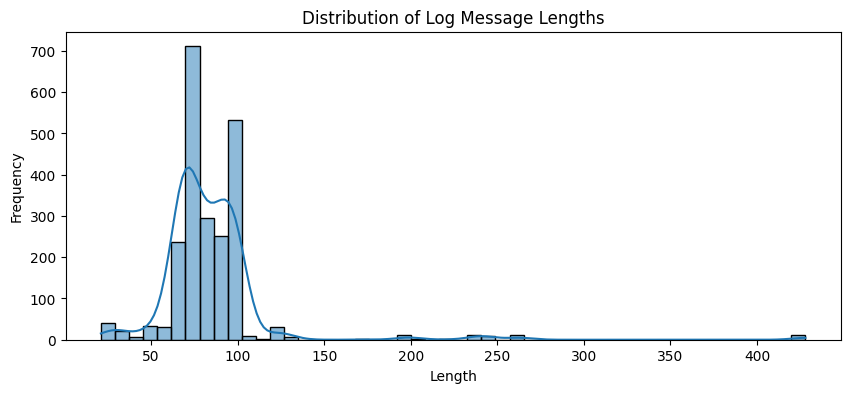

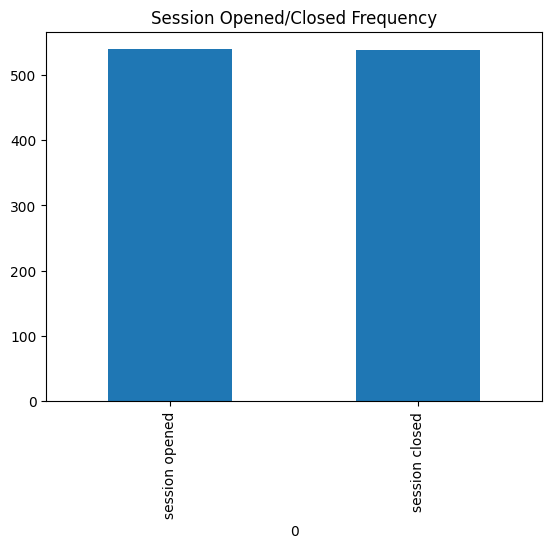

Top 10 most frequent logs:
message
systemd[1]: Starting librenms-scheduler.service - LibreNMS Scheduler...              74
systemd[1]: librenms-scheduler.service: Deactivated successfully.                    74
systemd[1]: Finished librenms-scheduler.service - LibreNMS Scheduler.                74
systemd[1]: syslog-ng.service: Failed with result 'exit-code'.                       12
systemd[1]: Failed to start syslog-ng.service - System Logger Daemon.                12
systemd[1]: Starting syslog-ng.service - System Logger Daemon...                     11
systemd[1]: syslog-ng.service: Main process exited, code=exited, status=1/FAILURE    10
systemd[1]: Starting sysstat-collect.service - system activity accounting tool...     7
systemd[1]: sysstat-collect.service: Deactivated successfully.                        7
systemd[1]: Finished sysstat-collect.service - system activity accounting tool.       7
Name: count, dtype: int64


In [2]:
# Đọc file log đã xử lý thành dataframe (từ bước preprocessing)
df = pd.read_csv('data/processed_log.csv')

# Hiển thị vài dòng đầu tiên
print(df.head())

# Phân phối độ dài từng dòng log
df['log_length'] = df['message'].apply(len)

plt.figure(figsize=(10, 4))
sns.histplot(df['log_length'], bins=50, kde=True)
plt.title('Distribution of Log Message Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

# Kiểm tra số lượng log theo loại session
df['message'].str.extract('(session (opened|closed))')[0].value_counts().plot(kind='bar')
plt.title('Session Opened/Closed Frequency')
plt.show()

# Tìm những log thường gặp nhất
print("Top 10 most frequent logs:")
print(df['message'].value_counts().head(10))
